In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/00


In [2]:
files={}
files['PMT']=R.TFile("LYSO_Optimisation.root")

In [3]:
g={}
for tag in ['MS3','OPT']:
    for t in ['lyAbs','lyNorm','tau','lyDT']:
        g['%s_%s_PMT'%(t,tag)]=files['PMT'].Get('%s_%s'%(t,tag))

In [4]:
arrays={}
arrays['MS3']={
    416:{'file':'data/tree_FirstRun006084_LastRun006087_ARRAY000416_OVSCAN_SUMMARY.root','prod':1},
    586:{'file':'data/tree_FirstRun006096_LastRun006099_ARRAY000586_OVSCAN_SUMMARY.root','prod':3},
    708:{'file':'data/tree_FirstRun006108_LastRun006111_ARRAY000708_OVSCAN_SUMMARY.root','prod':4},
    531:{'file':'data/tree_FirstRun006120_LastRun006123_ARRAY000531_OVSCAN_SUMMARY.root','prod':5},
}

arrays['OPT']={
    809:{'file':'data/tree_FirstRun006090_LastRun006093_ARRAY000809_OVSCAN_SUMMARY.root','prod':1},
    805:{'file':'data/tree_FirstRun006102_LastRun006105_ARRAY000805_OVSCAN_SUMMARY.root','prod':3},
    799:{'file':'data/tree_FirstRun006114_LastRun006117_ARRAY000799_OVSCAN_SUMMARY.root','prod':4},
    800:{'file':'data/tree_FirstRun006126_LastRun006129_ARRAY000800_OVSCAN_SUMMARY.root','prod':5},
}

map_prod={
    1:0,
    3:1,
    4:2,
    5:3,
    9:4,
    10:5
}

In [5]:
for tag in ['MS3','OPT']:
    for t in ['LY','LYDT','sigmaT','sigmaTvsLYDT','XT']:
        g['%s_%s'%(t,tag)]=R.TGraphErrors(len(map_prod))

for tag in ['MS3','OPT']:
    for ia,ar in enumerate(arrays[tag]):
        files[ar]=R.TFile(arrays[tag][ar]['file'])
        g['sigmaT_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
        g['LY_%d'%ar]=files[ar].Get('LY_vs_bar')
        g['XT_%d'%ar]=files[ar].Get('XT_vs_bar')
        iv=map_prod[arrays[tag][ar]['prod']]
        tau=g['tau_%s_PMT'%tag].GetY()[iv]
        print(ar,tau,arrays[tag][ar]['prod'])
        pos=iv
        if (tag=='OPT'):
            pos+=0.1
        g['LY_%s'%tag].SetPoint(iv,pos,g['LY_%d'%ar].GetY()[1]*3950/48.8) #use 4V measure
        g['LY_%s'%tag].SetPointError(iv,0,g['LY_%d'%ar].GetEY()[1]*3950/48.8)
        g['LYDT_%s'%tag].SetPoint(iv,pos,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau) #use 4V measure
        g['LYDT_%s'%tag].SetPointError(iv,0,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau)
        g['sigmaT_%s'%tag].SetPoint(iv,pos,g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
        g['sigmaT_%s'%tag].SetPointError(iv,0,g['sigmaT_%d'%ar].GetEY()[0]) #use 8V measure
        g['sigmaTvsLYDT_%s'%tag].SetPoint(iv,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
        g['XT_%s'%tag].SetPoint(iv,pos,g['XT_%d'%ar].GetY()[0]) #use 8V measure
        g['XT_%s'%tag].SetPointError(iv,0,g['XT_%d'%ar].GetEY()[0])

416 41.501023680885716 1
586 38.64825015700001 3
708 41.50460056108572 4
531 38.93710130215714 5
809 36.840169459049996 1
805 38.9534048111 3
799 40.113412081 4
800 37.440516378975 5


In [6]:
c1=R.TCanvas('c1','c1',800,600)
l=R.TLegend(0.8,0.8,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

tL=R.TLatex()#pm                                                                                                                               
tL.SetTextSize(0.04)
R.gStyle.SetOptTitle(0)

In [7]:
for k in ['MS3','OPT']:
    for h in ['LY','LYDT','sigmaT','XT']:
        g['%s_%s'%(h,k)].GetHistogram().SetBins(6,-0.5,6-0.5)
        for kk,vendor in enumerate([1,3,4,5,9,10]):
            g['%s_%s'%(h,k)].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

x[0]=0, y[0]=3949.34, ex[0]=0, ey[0]=104.712
x[1]=1, y[1]=3825.94, ex[1]=0, ey[1]=137.756
x[2]=2, y[2]=3744.46, ex[2]=0, ey[2]=142.393
x[3]=3, y[3]=4615.7, ex[3]=0, ey[3]=77.2372
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LY_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LY_ARRAY_byProd.pdf has been created


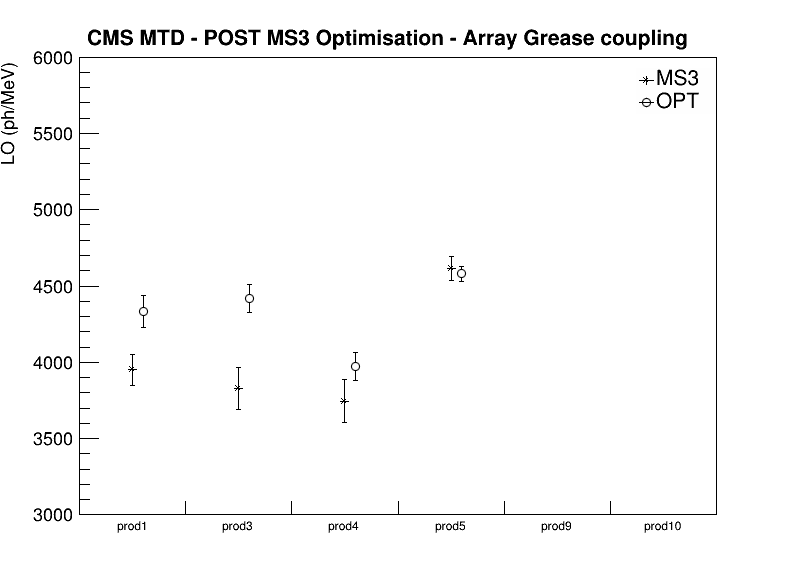

In [8]:
l.Clear()
g['LY_MS3'].Print()
g['LY_MS3'].Draw("AP*")
l.AddEntry(g['LY_MS3'],"MS3","PL")
g['LY_MS3'].GetHistogram().GetYaxis().SetLimits(3000,6000)
g['LY_MS3'].GetHistogram().GetYaxis().SetRangeUser(3000,6000)
g['LY_MS3'].GetHistogram().GetYaxis().SetTitle("LO (ph/MeV)")
g['LY_OPT'].SetMarkerStyle(24)
g['LY_OPT'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT'],"OPT","PL")
g['LY_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LY_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=96.8065, ex[0]=0, ey[0]=3.88181
x[1]=1, y[1]=99.3941, ex[1]=0, ey[1]=5.24674
x[2]=2, y[2]=99.799, ex[2]=0, ey[2]=4.1517
x[3]=3, y[3]=91.1651, ex[3]=0, ey[3]=3.15793
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT_ARRAY_byProd.pdf has been created


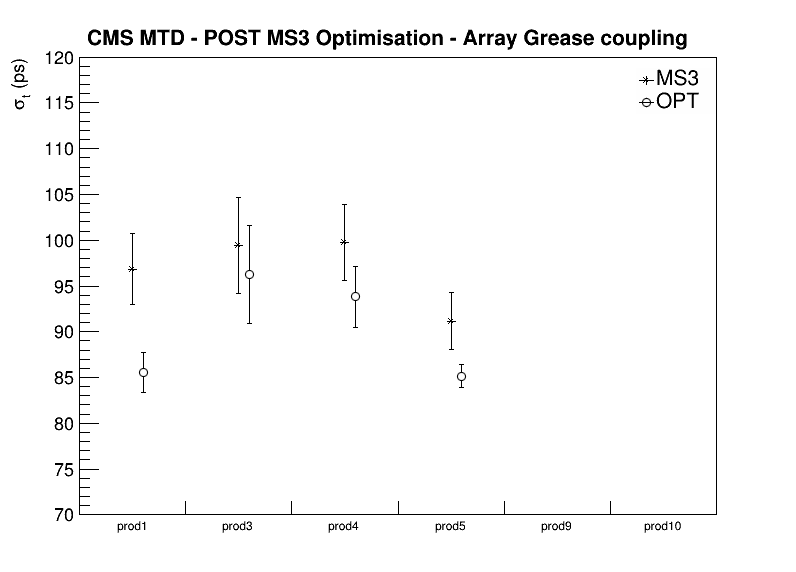

In [9]:
g['sigmaT_MS3'].Print()
g['sigmaT_MS3'].Draw("AP*")
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetLimits(70,120)
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetRangeUser(70,120)
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} (ps)")
g['sigmaT_OPT'].SetMarkerStyle(24)
g['sigmaT_OPT'].SetMarkerSize(1.2)
g['sigmaT_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=95.1625, ex[0]=0, ey[0]=2.52311
x[1]=1, y[1]=98.9939, ex[1]=0, ey[1]=3.56436
x[2]=2, y[2]=90.2181, ex[2]=0, ey[2]=3.43079
x[3]=3, y[3]=118.542, ex[3]=0, ey[3]=1.98364
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LYDT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LYDT_ARRAY_byProd.pdf has been created


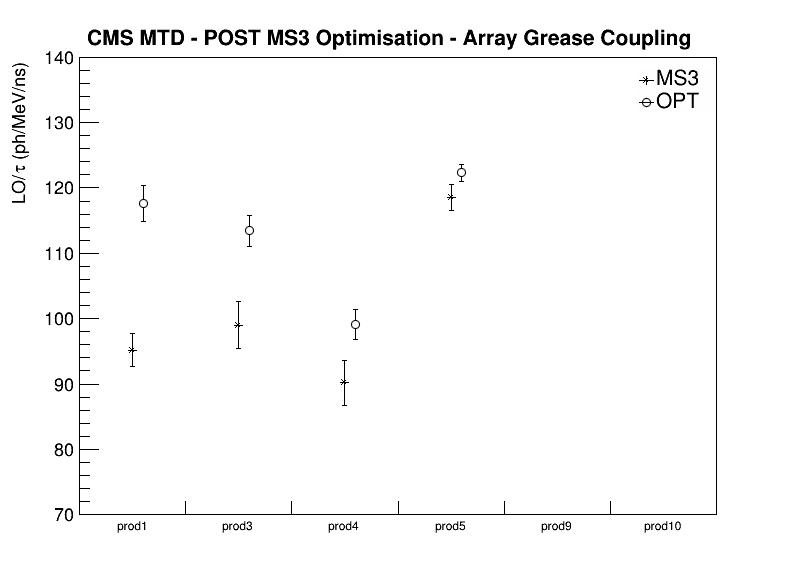

In [10]:
g['LYDT_MS3'].Print()
g['LYDT_MS3'].Draw("AP*")
g['LYDT_MS3'].GetHistogram().GetYaxis().SetLimits(70,140)
g['LYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(70,140)
g['LYDT_MS3'].GetHistogram().GetYaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['LYDT_OPT'].SetMarkerStyle(24)
g['LYDT_OPT'].SetMarkerSize(1.2)
g['LYDT_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease Coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LYDT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=0.161331, ex[0]=0, ey[0]=0.0111908
x[1]=1, y[1]=0.186814, ex[1]=0, ey[1]=0.0165171
x[2]=2, y[2]=0.183841, ex[2]=0, ey[2]=0.0154871
x[3]=3, y[3]=0.211497, ex[3]=0, ey[3]=0.0151006
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LYDT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LYDT_ARRAY_byProd.pdf has been created


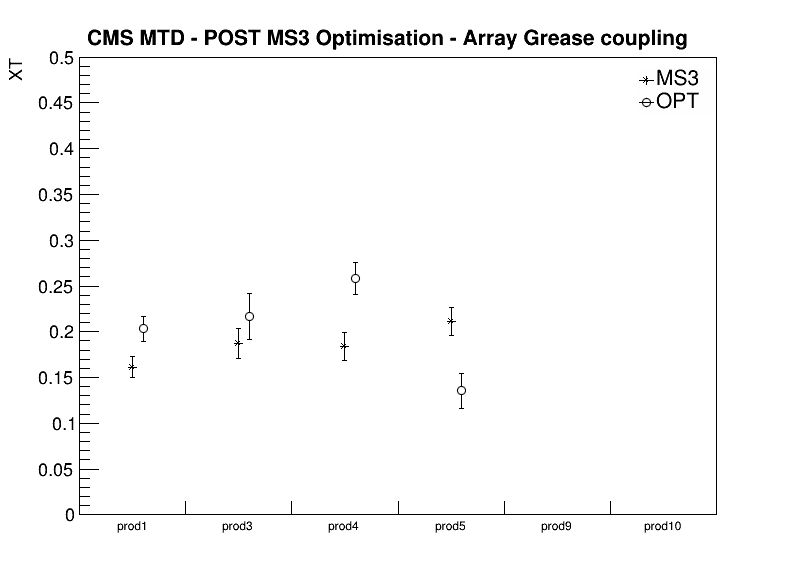

In [12]:
g['XT_MS3'].Print()
g['XT_MS3'].Draw("AP*")
g['XT_MS3'].GetHistogram().GetYaxis().SetLimits(0.000001,0.5)
g['XT_MS3'].GetHistogram().GetYaxis().SetRangeUser(0.000001,0.5)
g['XT_MS3'].GetHistogram().GetYaxis().SetTitle("XT")
g['XT_OPT'].SetMarkerStyle(24)
g['XT_OPT'].SetMarkerSize(1.2)
g['XT_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LYDT_ARRAY_byProd.%s'%ext)